In [233]:
import math                
import torch               
import torch.nn as nn      
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# **First Function** 

The first function is defined as  

$$
f_{1}(x,y) = \sin(2\pi x) \cdot \sin(2\pi y)
$$

**Shallow Network**

epoch 500 MSE=0.103843
epoch 1000 MSE=0.093884
epoch 1500 MSE=0.081611
epoch 2000 MSE=0.067002
epoch 2500 MSE=0.069243
epoch 3000 MSE=0.059741


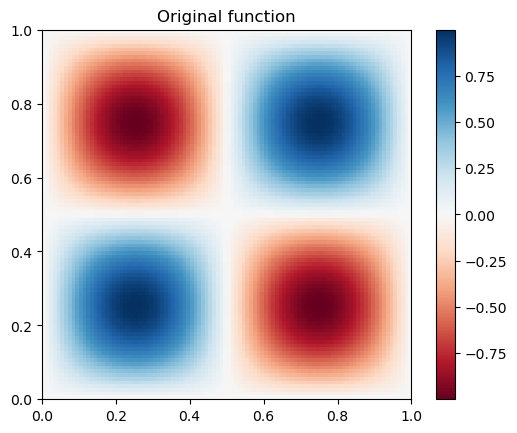

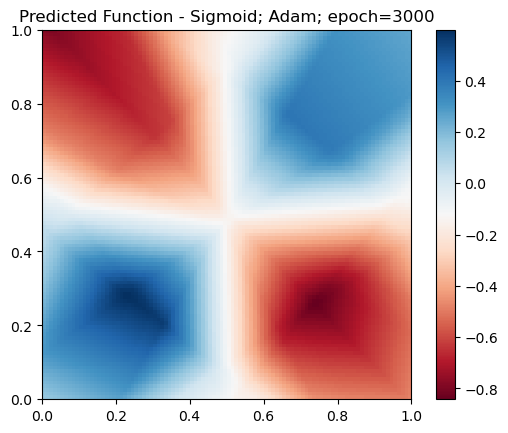

In [412]:
# generate data
N = 4000
X = torch.rand(N,2) 
y = torch.sin(2*math.pi*X[:,0:1]) * torch.sin(2*math.pi*X[:,1:2])
# build model
nodes=50
model = nn.Sequential(nn.Linear(2,nodes),
                      nn.ReLU(),
                      nn.Linear(nodes,1)) # 2 inputs, 1 output, 50 neurons in the hidden layer

# choose the loss function & training method
loss_function = nn.MSELoss() # since this is a regression problem
optimize=optim.SGD(model.parameters(),lr=0.1)

# training loop
for epoch in range(3000): # 1 epoch = one complete pass thru the entire training dataset to train a model.
    
    predict = model(X) # forward pass
    loss = loss_function(predict, y) # compute error
    optimize.zero_grad() # clear old gradidents
    loss.backward() # compute new gradidents
    optimize.step() # update weights
    
    if (epoch+1) % 500 ==0: # print the loss function every 50 epochs
        print(f"epoch {epoch+1:03d} MSE={loss.item():.06f}")

with torch.no_grad():
    p = torch.linspace(0,1,100)
    xp,yp = torch.meshgrid(p,p,indexing="ij")
    grid = torch.stack([xp.reshape(-1),yp.reshape(-1)], dim=1)
    Z_true = (torch.sin(2*math.pi*grid[:,0:1]) * torch.sin(2*math.pi*grid[:,1:2])).reshape(100,100)
    Z_predicted = model(grid).reshape(100,100)
plt.figure()
plt.title("Original function")
plt.imshow(Z_true.numpy(),origin="lower",extent=[0,1,0,1],cmap='RdBu')
plt.colorbar()
plt.figure()
plt.title("Predicted Function - Sigmoid; Adam; epoch=3000")
plt.imshow(Z_predicted.numpy(),origin="lower",extent=[0,1,0,1],cmap='RdBu')
plt.colorbar()
plt.savefig("PredictedFunction.png", dpi=300, bbox_inches='tight')
plt.show()

**Deep Neural Network**

epoch 500 MSE=0.248889
epoch 1000 MSE=0.247028
epoch 1500 MSE=0.130543
epoch 2000 MSE=0.035840
epoch 2500 MSE=0.004465
epoch 3000 MSE=0.000561


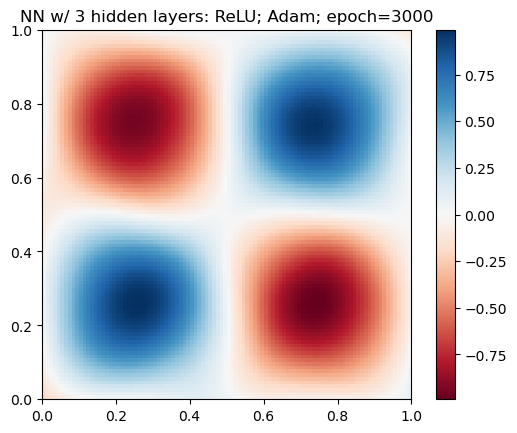

In [297]:
# generate data
N = 4000
X = torch.rand(N,2) 
y = torch.sin(2*math.pi*X[:,0:1]) * torch.sin(2*math.pi*X[:,1:2])
# build model
nodes=50
act = nn.Sigmoid() ####
model = nn.Sequential(nn.Linear(2,nodes), act,
                      nn.Linear(nodes,nodes),act,
                      nn.Linear(nodes,nodes),act,
                      nn.Linear(nodes,1)) # 2 inputs, 1 output, 50 neurons in the hidden layer

# choose the loss function & training method
loss_function = nn.MSELoss() # since this is a regression problem
optimize=optim.Adam(model.parameters(),lr=0.001)

# training loop
for epoch in range(3000): # 1 epoch = one complete pass thru the entire training dataset to train a model.
    
    predict = model(X) # forward pass
    loss = loss_function(predict, y) # compute error
    optimize.zero_grad() # clear old gradidents
    loss.backward() # compute new gradidents
    optimize.step() # update weights
    
    if (epoch+1) % 500 ==0: # print the loss function every 50 epochs
        print(f"epoch {epoch+1:03d} MSE={loss.item():.06f}")

with torch.no_grad():
    p = torch.linspace(0,1,100)
    xp,yp = torch.meshgrid(p,p,indexing="ij")
    grid = torch.stack([xp.reshape(-1),yp.reshape(-1)], dim=1)
    Z_true = (torch.sin(2*math.pi*grid[:,0:1]) * torch.sin(2*math.pi*grid[:,1:2])).reshape(100,100)
    Z_predicted = model(grid).reshape(100,100)
import numpy as np
plt.figure()
plt.title("NN w/ 3 hidden layers: ReLU; Adam; epoch=3000")
plt.imshow(Z_predicted.numpy(),origin="lower",extent=[0,1,0,1],cmap='RdBu')
plt.colorbar()
plt.savefig("PredictedFunctionNN.png", dpi=300, bbox_inches='tight')
plt.show()

# **Second Function**

The second function is defined as  

$$
f_{2}(x,y) =
\begin{cases}
1 & \text{if } x > y \\
0 & \text{if } x \leq y
\end{cases}
$$


**Deep Neural Network**

epoch 500  BCE=0.277230  acc=97.03%
epoch 1000  BCE=0.142220  acc=99.10%
epoch 1500  BCE=0.097171  acc=99.50%


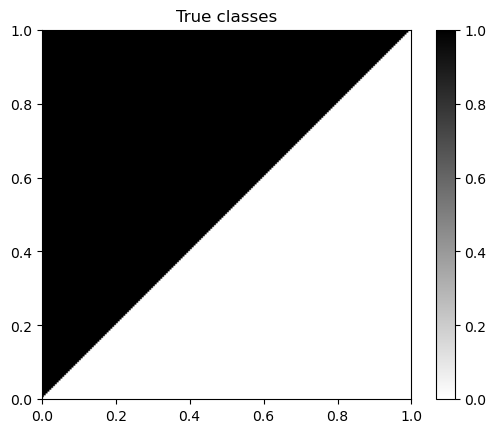

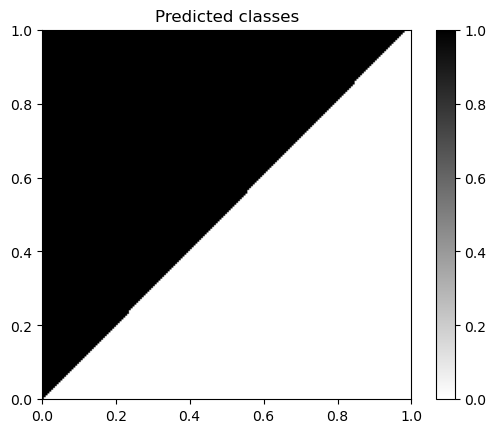

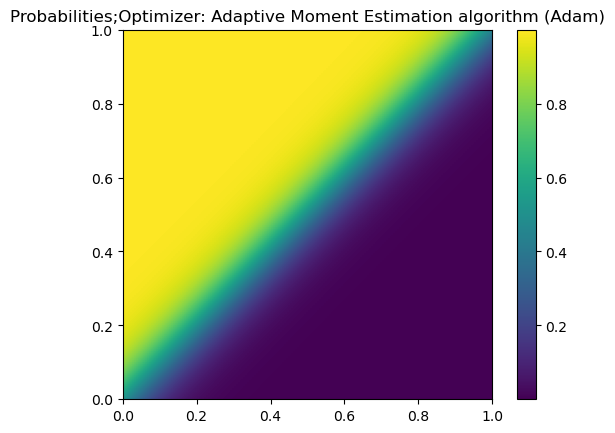

In [426]:
N = 4000
X = torch.rand(N, 2) 
y = (X[:, 0:1] > X[:, 1:2]).float() #this a boolean tensor: True where x>y, otherwise false. 


noepoch = 1500
act = nn.Sigmoid()

# build model
nodes =50;
model = nn.Sequential(nn.Linear(2,nodes), act, nn.Linear(nodes,1))


# choose the loss function & training method
loss_function = nn.BCEWithLogitsLoss() # for classification & it squeezes the output at the end.
optimize = optim.Adam(model.parameters(), lr=0.001)
# training loop
for epoch in range(noepoch):
    logits = model(X)
    loss = loss_function(logits, y)

    optimize.zero_grad()
    loss.backward()
    optimize.step()
    if (epoch + 1) % 500 == 0:
        with torch.no_grad():
            probs = torch.sigmoid(logits)              # turn logits into probabilities
            preds = (probs >= 0.5).float()             # threshold at 0.5 to get 0/1
            acc = (preds == y).float().mean().item()   # fraction correct
        print(f"epoch {epoch+1:03d}  BCE={loss.item():.6f}  acc={acc*100:.2f}%")


p = torch.linspace(0, 1, 200)
xp, yp = torch.meshgrid(p, p, indexing="ij")
grid = torch.stack([xp.reshape(-1), yp.reshape(-1)], dim=1)  # (200*200, 2)
Z_true  = (grid[:, 0:1] > grid[:, 1:2]).float().reshape(200, 200)
Z_logit = model(grid)
Z_prob  = torch.sigmoid(Z_logit).reshape(200, 200)
Z_pred  = (Z_prob >= 0.5).float()
plt.figure(); plt.title("True classes")
plt.imshow(Z_true.detach().numpy(), origin="lower", extent=[0,1,0,1], cmap="gray_r"); plt.colorbar()
plt.savefig("TrueShallow.png", dpi=300, bbox_inches='tight')

plt.figure(); plt.title("Predicted classes")
plt.imshow(Z_pred.detach().numpy(), origin="lower", extent=[0,1,0,1], cmap="gray_r"); plt.colorbar()
plt.savefig("predictedShallow.png", dpi=300, bbox_inches='tight')

plt.figure(); plt.title("Probabilities;Optimizer: Adaptive Moment Estimation algorithm (Adam)")
plt.imshow(Z_prob.detach().numpy(), origin="lower", extent=[0,1,0,1], cmap="viridis"); plt.colorbar()
plt.savefig("probabilitiesShallow.png", dpi=300, bbox_inches='tight')
plt.show()

Neural Network

epoch 500  BCE=0.007258  acc=99.80%
epoch 1000  BCE=0.004181  acc=99.92%
epoch 1500  BCE=0.003232  acc=99.92%


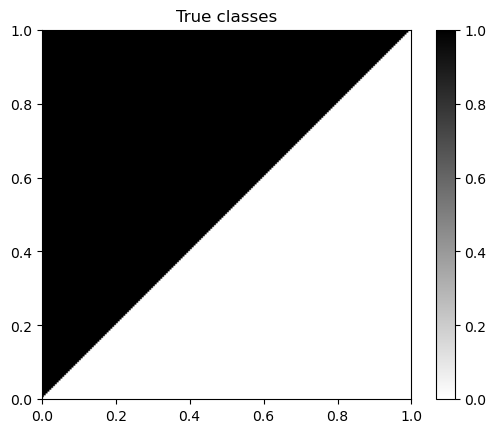

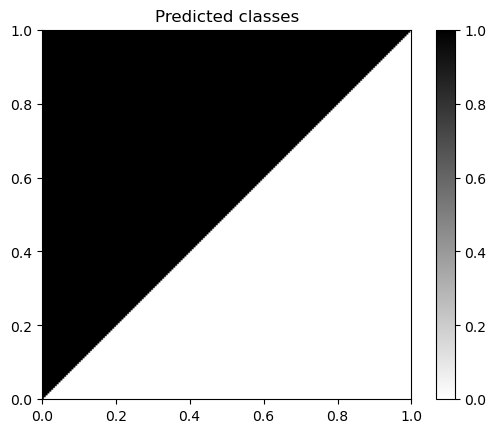

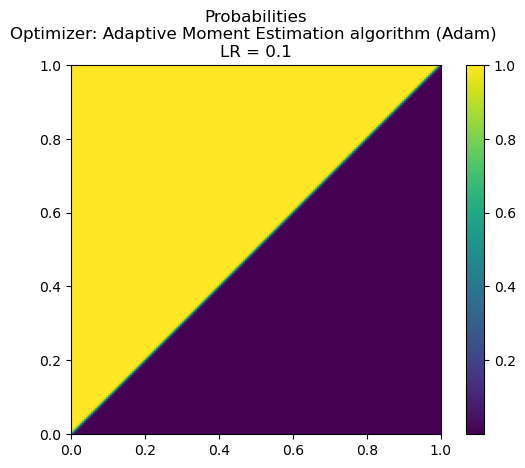

In [459]:
N = 4000
X = torch.rand(N, 2) 
y = (X[:, 0:1] > X[:, 1:2]).float() #this a boolean tensor: True where x>y, otherwise false. 


noepoch = 1500
act = nn.Sigmoid()

# build model
nodes =50;
model = nn.Sequential(nn.Linear(2, nodes), act,     
                      nn.Linear(nodes, nodes), act,
                      nn.Linear(nodes, nodes), act, 
                      nn.Linear(nodes, 1)     
)


# choose the loss function & training method
loss_function = nn.BCEWithLogitsLoss() # for classification & it squeezes the output at the end.
optimize = optim.Adam(model.parameters(), lr=0.01)
# training loop
for epoch in range(noepoch):
    logits = model(X)
    loss = loss_function(logits, y)

    optimize.zero_grad()
    loss.backward()
    optimize.step()
    if (epoch + 1) % 500 == 0:
        with torch.no_grad():
            probs = torch.sigmoid(logits)              # turn logits into probabilities
            preds = (probs >= 0.5).float()             # threshold at 0.5 to get 0/1
            acc = (preds == y).float().mean().item()   # fraction correct
        print(f"epoch {epoch+1:03d}  BCE={loss.item():.6f}  acc={acc*100:.2f}%")


p = torch.linspace(0, 1, 200)
xp, yp = torch.meshgrid(p, p, indexing="ij")
grid = torch.stack([xp.reshape(-1), yp.reshape(-1)], dim=1)  # (200*200, 2)
Z_true  = (grid[:, 0:1] > grid[:, 1:2]).float().reshape(200, 200)
Z_logit = model(grid)
Z_prob  = torch.sigmoid(Z_logit).reshape(200, 200)
Z_pred  = (Z_prob >= 0.5).float()
plt.figure(); plt.title("True classes")
plt.imshow(Z_true.detach().numpy(), origin="lower", extent=[0,1,0,1], cmap="gray_r"); plt.colorbar()
plt.savefig("TrueDeepNeural.png", dpi=300, bbox_inches='tight')

plt.figure(); plt.title("Predicted classes")
plt.imshow(Z_pred.detach().numpy(), origin="lower", extent=[0,1,0,1], cmap="gray_r"); plt.colorbar()
plt.savefig("predictedDeepNeuralw.png", dpi=300, bbox_inches='tight')

plt.figure(); plt.title("Probabilities\nOptimizer: Adaptive Moment Estimation algorithm (Adam) \nLR = 0.1")
plt.imshow(Z_prob.detach().numpy(), origin="lower", extent=[0,1,0,1], cmap="viridis"); plt.colorbar()
plt.savefig("probabilitiesDeepNeural.png", dpi=300, bbox_inches='tight')
plt.show()